Author: Neven Caplar and the LINCC Frameworks team

Last updated: July 06, 2025

# RAIL photo-z estimates for Rubin Data Preview 1 (DP1)


In this tutorial, you will learn:

- How to access photo-z catalog derived from Rubin’s Data Preview 1 with LSDB 

# Loading through LSDB

Photo-z Science Unit generated photo-z estimates for every galaxy in DP1 using the available multi-band imaging on a best-effort basis. This effort is described at https://sitcomtn-154.lsst.io. 

In [ ]:
import lsdb
import matplotlib.pyplot as plt

# replace with data.lsst.cloud / CANFAR path
dp1_pz_catalog = lsdb.open_catalog("/sdf/data/rubin/shared/lsdb_commissioning/dp1/dp1_release/object_photoz")
dp1_pz_catalog

FileNotFoundError: Failed to read HATS at location /sdf/data/rubin/shared/lsdb_commissioning/dp1/dp1_release/object_photoz

In [10]:
# Extract method names based on column suffix to learn what photo-z methods are available
z_median_methods = sorted(
    col.replace("_z_median", "")
    for col in dp1_pz_catalog.all_columns
    if col.endswith("_z_median")
)

print(z_median_methods)

['bpz', 'cmnn', 'dnf', 'fzboost', 'gpz', 'knn', 'lephare', 'tpz']


## Plotting two estimators

Plotting, as an example, the results from Lephare and kNN.

In [3]:
dp1_pz_df = lsdb.open_catalog("/sdf/data/rubin/shared/lsdb_commissioning/dp1/dp1_release/object_photoz", columns = ["lephare_z_median", "knn_z_median"]).compute()

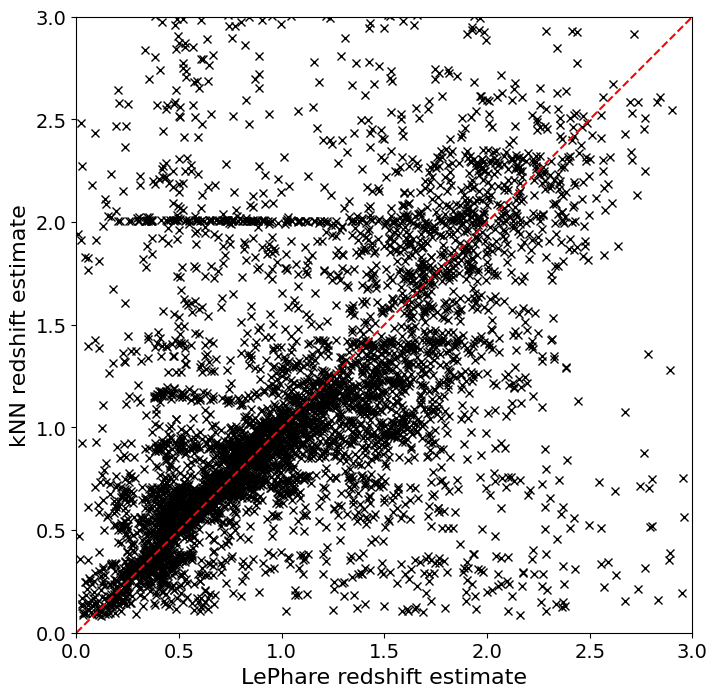

In [5]:
plt.figure(figsize=(8, 8))

# Plot sampled points
plt.plot(dp1_pz_df["lephare_z_median"].iloc[::100], dp1_pz_df["knn_z_median"].iloc[::100], "x", color="black")

# Set equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")

# Plot reference y=x line
plt.plot([0, 3], [0, 3], color="red", ls="--")

# Set axis limits
plt.xlim([0, 3])
plt.ylim([0, 3])

# Set axis labels with larger font size and descriptions
plt.xlabel("LePhare redshift estimate", fontsize=16)
plt.ylabel("kNN redshift estimate", fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
